In [9]:
import numpy as np                     #importing required libraries
import matplotlib.pyplot as plt

In [2]:
def fitness_sel(weight,value,threshold,population):   # fitness calculation function as per the size of population
    fitness = np.empty(len(population))
    for i in range (0,len(population)):
        values_sum = 0
        weight_sum = 0
        for j in range (0,100):
            values_sum += population[i][j] * value[j]
            weight_sum += population[i][j] * weight[j]
        if weight_sum <= threshold:                # checking the threshold limit for calculation of fitness
            fitness[i] = values_sum
        else :
            fitness[i] = 0                      # if weight is exceeding limit set fitness to zero
    return fitness                                 # returning the fitness value 

In [10]:
def tour_selection(fitness, population, numb):           # tournament function for generation of winner 
    vals = np.random.randint(0,len(population),numb)     # random selection as per the tournament size
    winner = 0.0
    winner_id = 0
    for i in vals :
        if fitness[i] > winner:
            winner = fitness[i]
            winner_id = i
    return winner_id                                    # returning winner id back to get the parent

In [11]:
def crossover(parentA, parentB):                     # crossover between the parents for generating next better generation 
    cross = np.random.randint(0,len(parentA))         # generating a crossover point to perform crossover
    for j in range (cross, len(parentA)):
        temp = parentA[j]
        parentA[j] = parentB[j]
        parentB[j] = temp
    return parentA, parentB                      # returning the parents after the crossover as new generated child

In [5]:
def mutation(childA, childB,fitness):           # mutation of the children to get the better fit generation
    locusA = np.random.randint(0,len(childA))   # generating a locus point to perform mutation
    locusB = np.random.randint(0,len(childB))
    if childA[locusA] == 0:                     # mutation for every child as per their locus point
        childA[locusA] = 1 - childA[locusA]
    if childB[locusB] == 0:
        childB[locusB] = 1 - childB[locusB]
    return childA, childB                    # mutant children are returned

In [12]:
def worst_replace(childA, childB, population, fitness, value, weight, threshold):  # replacing the worst with the new generated children to get better population
    values_sum1 = 0
    values_sum2 = 0
    weights_sum1 = 0
    weights_sum2 = 0
    for j in range (0,len(childA)):
        values_sum1 += childA[j] * value[j]
        values_sum2 += childB[j] * value[j]
        weights_sum1 += childA[j] * weight[j]
        weights_sum2 += childB[j] * weight[j]
    val = np.argmin(fitness)
    if weights_sum1 < threshold:            # checking the new geneartion weight as per the threshold limit and then do replacement
        fitness[val] = values_sum1
        population[val] = childA
        val = np.argmin([np.argpartition(fitness, val)])
    if weights_sum2 < threshold:
        fitness[val] = values_sum2
        population[val] = childB
    return population, fitness    # returning the new population and fitness

In [13]:
def main():  # main function from which all the working starts and controlled 
    text_file = open("./BankProblem.txt", "r")   # reading data from the given file
    data = text_file.read().split('\n')
    van_weight = int(data[0].split(':')[1])    # maximum van capacity as per the data 
    weights = []                         # weight of the bags
    values = []                          # values of the bag
    for i in range (0, len(data)):
        if 'weight' in data[i]:
            weights.append(float(data[i].split(':')[1]))
        elif 'value' in data[i]:
            values.append(int(data[i].split(':')[1]))
        i +=1
    trials = input("Enter the number of trials you want - ")
    pop_size = input("Enter the size of population - ")      # population size as per the requirement
    tour_size = input("\n Enter the tournament size - ")     # defining tournament size for further parent generation
    iteration = input("\n Enter the number of iterations - ") # number of times this process should work
    cross = input("\n Do you want to perform crossover? Y or N ") 
    mutation_rate =  input("\n Enter the number of mutation you want to perform - ")
    trial_fitness = []
    for i in range (0,int(trials)):
        best_fit = []                                           # best fitness generated after every fitness
        population = np.random.randint(0,2,(int(pop_size),100))  # population generation
        fitness = fitness_sel(weights,values,van_weight,population) # fitness generation
        for i in range (0,int(iteration)):
            index = tour_selection(fitness, population, int(tour_size))
            parentA = population[index]
            index = tour_selection(fitness, population, int(tour_size))
            parentB = population[index]  #parent generated
            childC = []
            childD = []
            if cross == 'y' or cross == 'Y' or cross == 'yes' or cross == 'Yes' or cross == 'YES':
                childC, childD = crossover(parentA, parentB)          #crossover between parents for child generation
            else:
                childC = parentA                          # continuing with new generation without crossover 
                childD = parentB
            mut_childE = []
            mut_childF = []
            for j in range (0, len(mutation_rate)):  # perform mutation as per the given rate
                mut_childE, mut_childF = mutation(childC, childD,fitness)   #mutation of children 
            population,fitnesss = worst_replace(mut_childE, mut_childF, population, fitness, values,weights, van_weight) #worst case replacement with the population
            best_fit.append(np.max(fitness))    
            max_fit_id = np.argmax(fitness)
        print("Maximum fitness is ", fitness[max_fit_id]) 
        plt.plot(np.arange(int(iteration)), best_fit)   # plotting the values of fitness for each trials
        plt.scatter(int(iteration), fitness[max_fit_id]) # pointing to the maximum fitness of each trial
        trial_fitness.append(fitness[max_fit_id])
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.show()
    print('Fitness are - ', trial_fitness)

Enter the number of trials you want - 5
Enter the size of population - 100

 Enter the tournament size - 2

 Enter the number of iterations - 10000

 Do you want to perform crossover? Y or N Y

 Enter the number of mutation you want to perform - 1
Maximum fitness is  4237.0
Maximum fitness is  4296.0
Maximum fitness is  4287.0
Maximum fitness is  4086.0
Maximum fitness is  4228.0


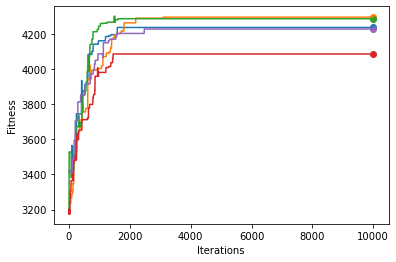

Fitness are -  [4237.0, 4296.0, 4287.0, 4086.0, 4228.0]


In [14]:
main() 